# xfilter: an xarray-wrapper of the scipy-based filter

* Wenchang Yang (wenchang@princeton.edu)

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.dpi'] = 150

import xfilter

## raw data 

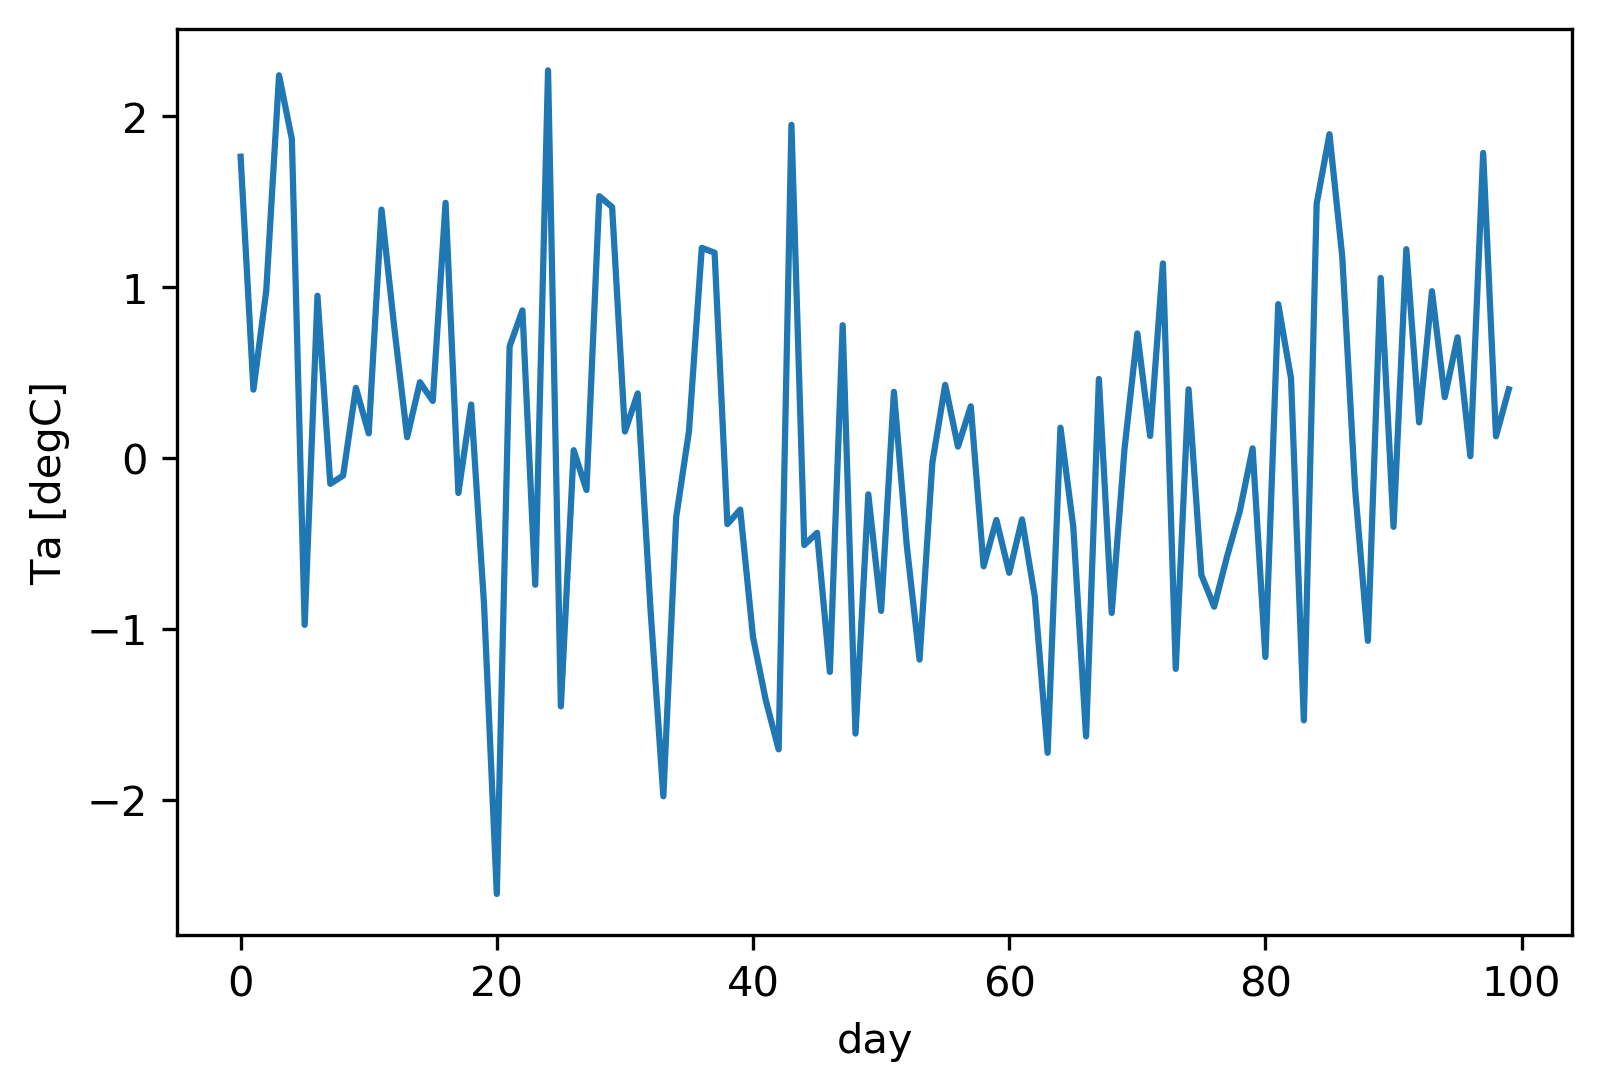

In [7]:
np.random.seed(0)
da = xr.DataArray(np.random.randn(100), dims='day', name='Ta', attrs={'units': 'degC'})
da.plot()

## lowpass 

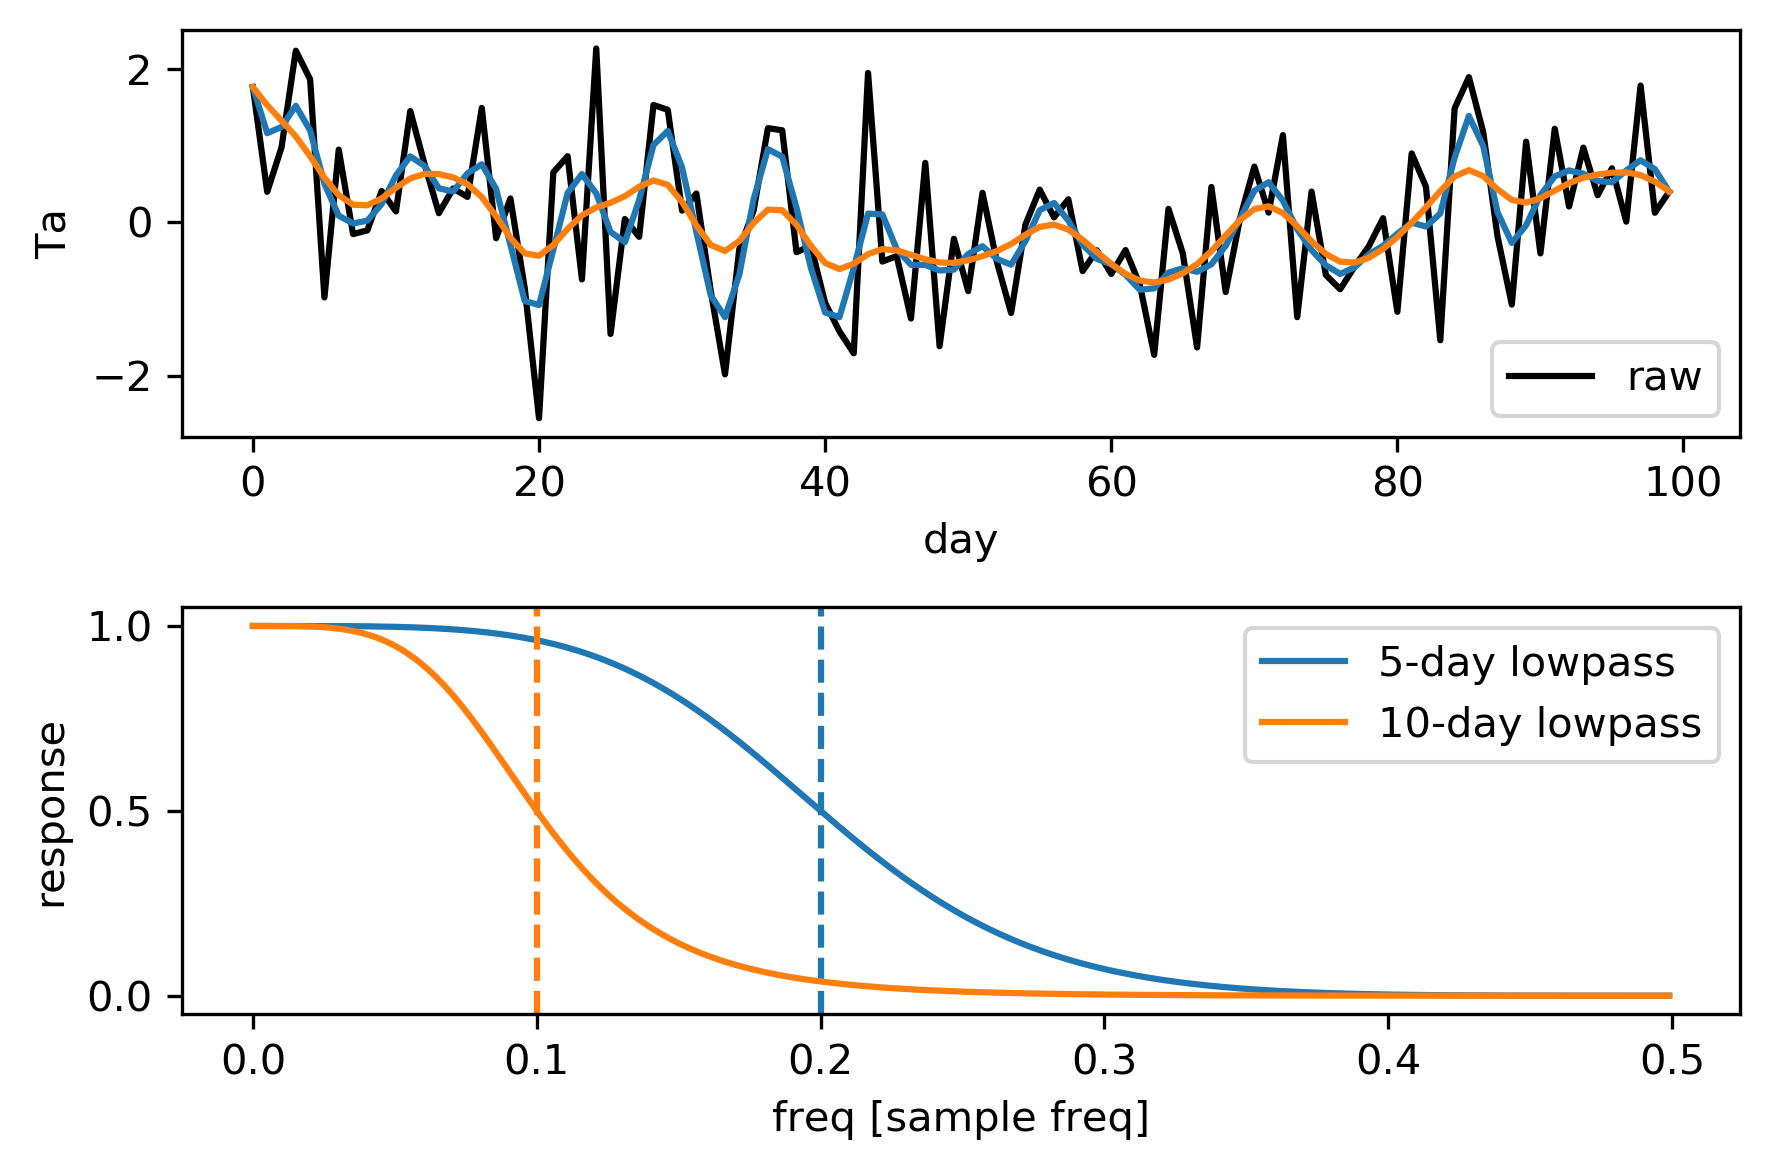

In [8]:
fig, axes = plt.subplots(2, 1)
ax = axes[0]
da.plot(label='raw', color='k', ax=ax)
da.filter.lowpass(1/5).plot(ax=ax)
da.filter.lowpass(1/10).plot(ax=ax)
ax.legend(loc='lower right')

ax = axes[1]
xfilter.lowpass_response(1/5).plot(label='5-day lowpass', ax=ax)
ax.axvline(1/5, ls='--', color='C0')
xfilter.lowpass_response(1/10).plot(label='10-day lowpass', ax=ax)
ax.axvline(1/10, ls='--', color='C1')
ax.legend()

plt.tight_layout()

## highpass 

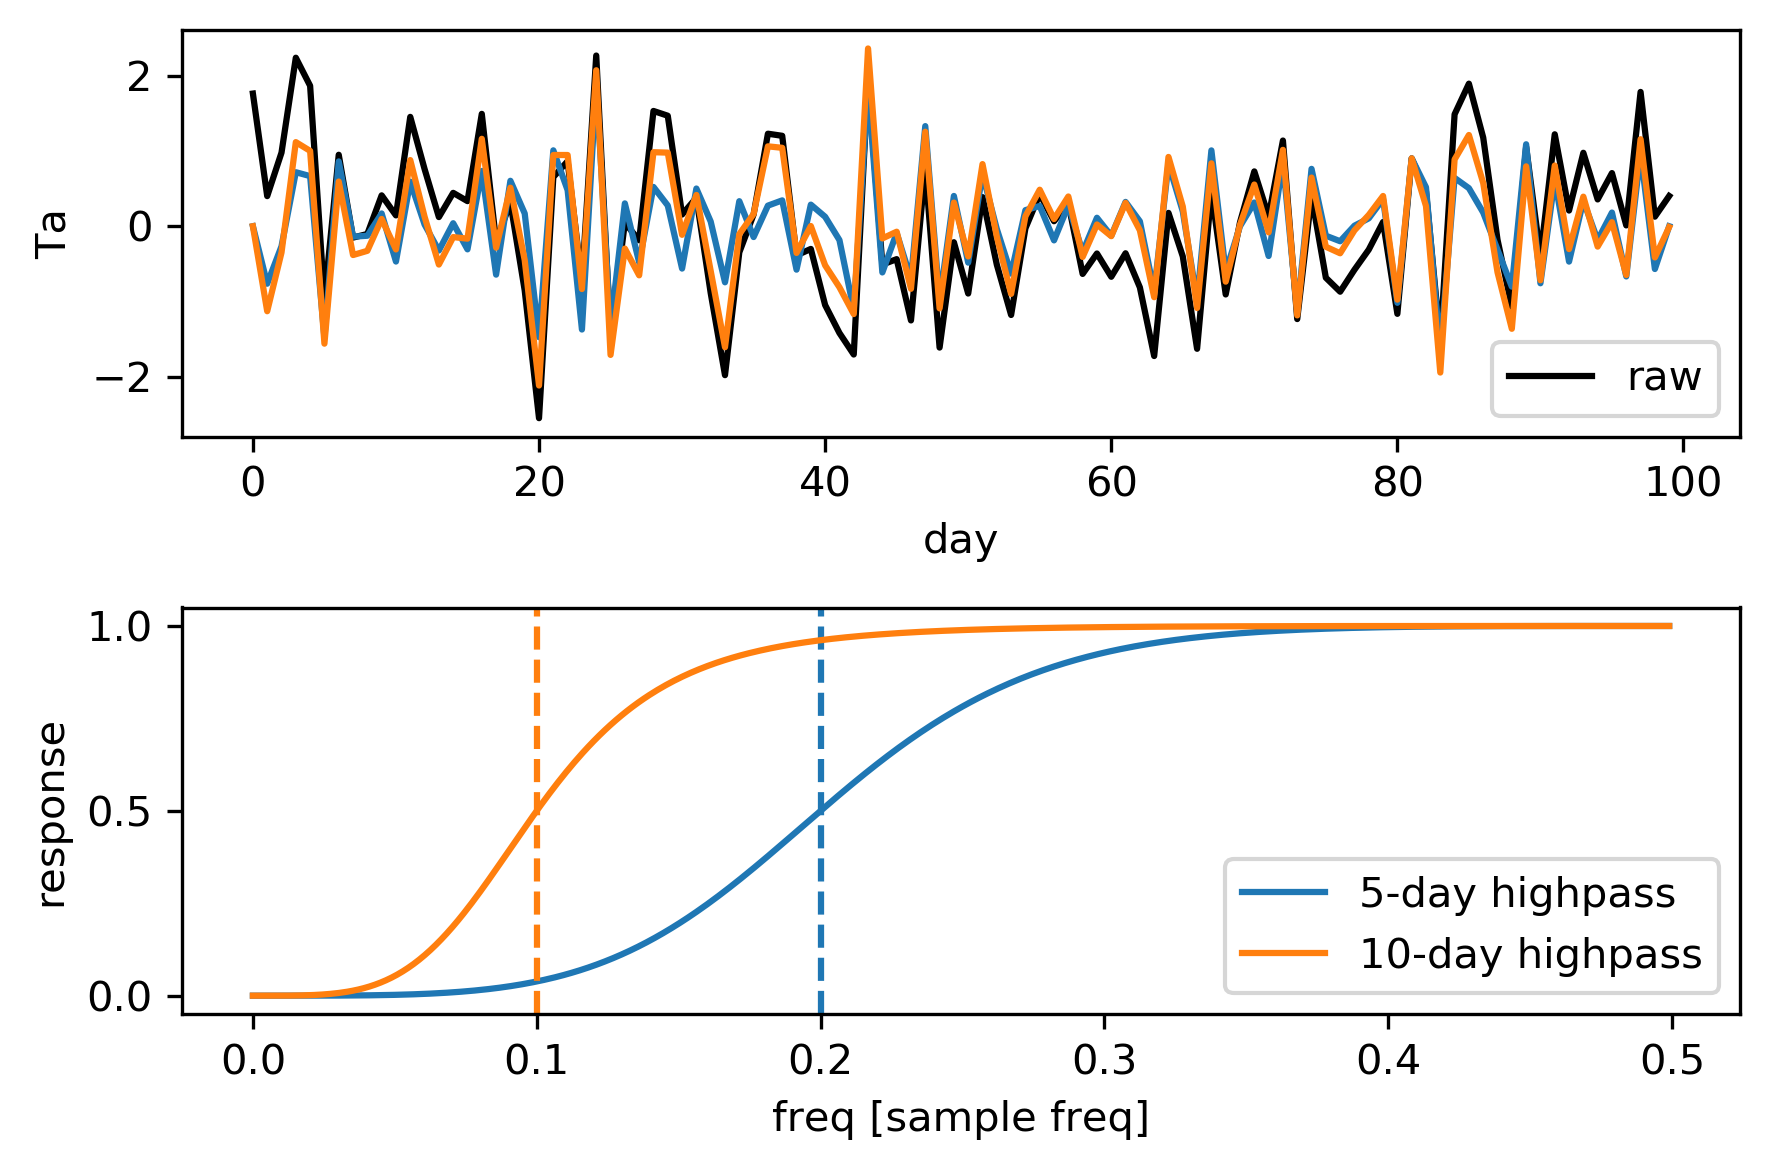

In [9]:
fig, axes = plt.subplots(2, 1)
ax = axes[0]
da.plot(label='raw', color='k', ax=ax)
da.filter.highpass(1/5).plot(ax=ax)
da.filter.highpass(1/10).plot(ax=ax)
ax.legend(loc='lower right')

ax = axes[1]
xfilter.highpass_response(1/5).plot(label='5-day highpass', ax=ax)
ax.axvline(1/5, ls='--', color='C0')
xfilter.highpass_response(1/10).plot(label='10-day highpass', ax=ax)
ax.axvline(1/10, ls='--', color='C1')
ax.legend()

plt.tight_layout()

## bandpass 

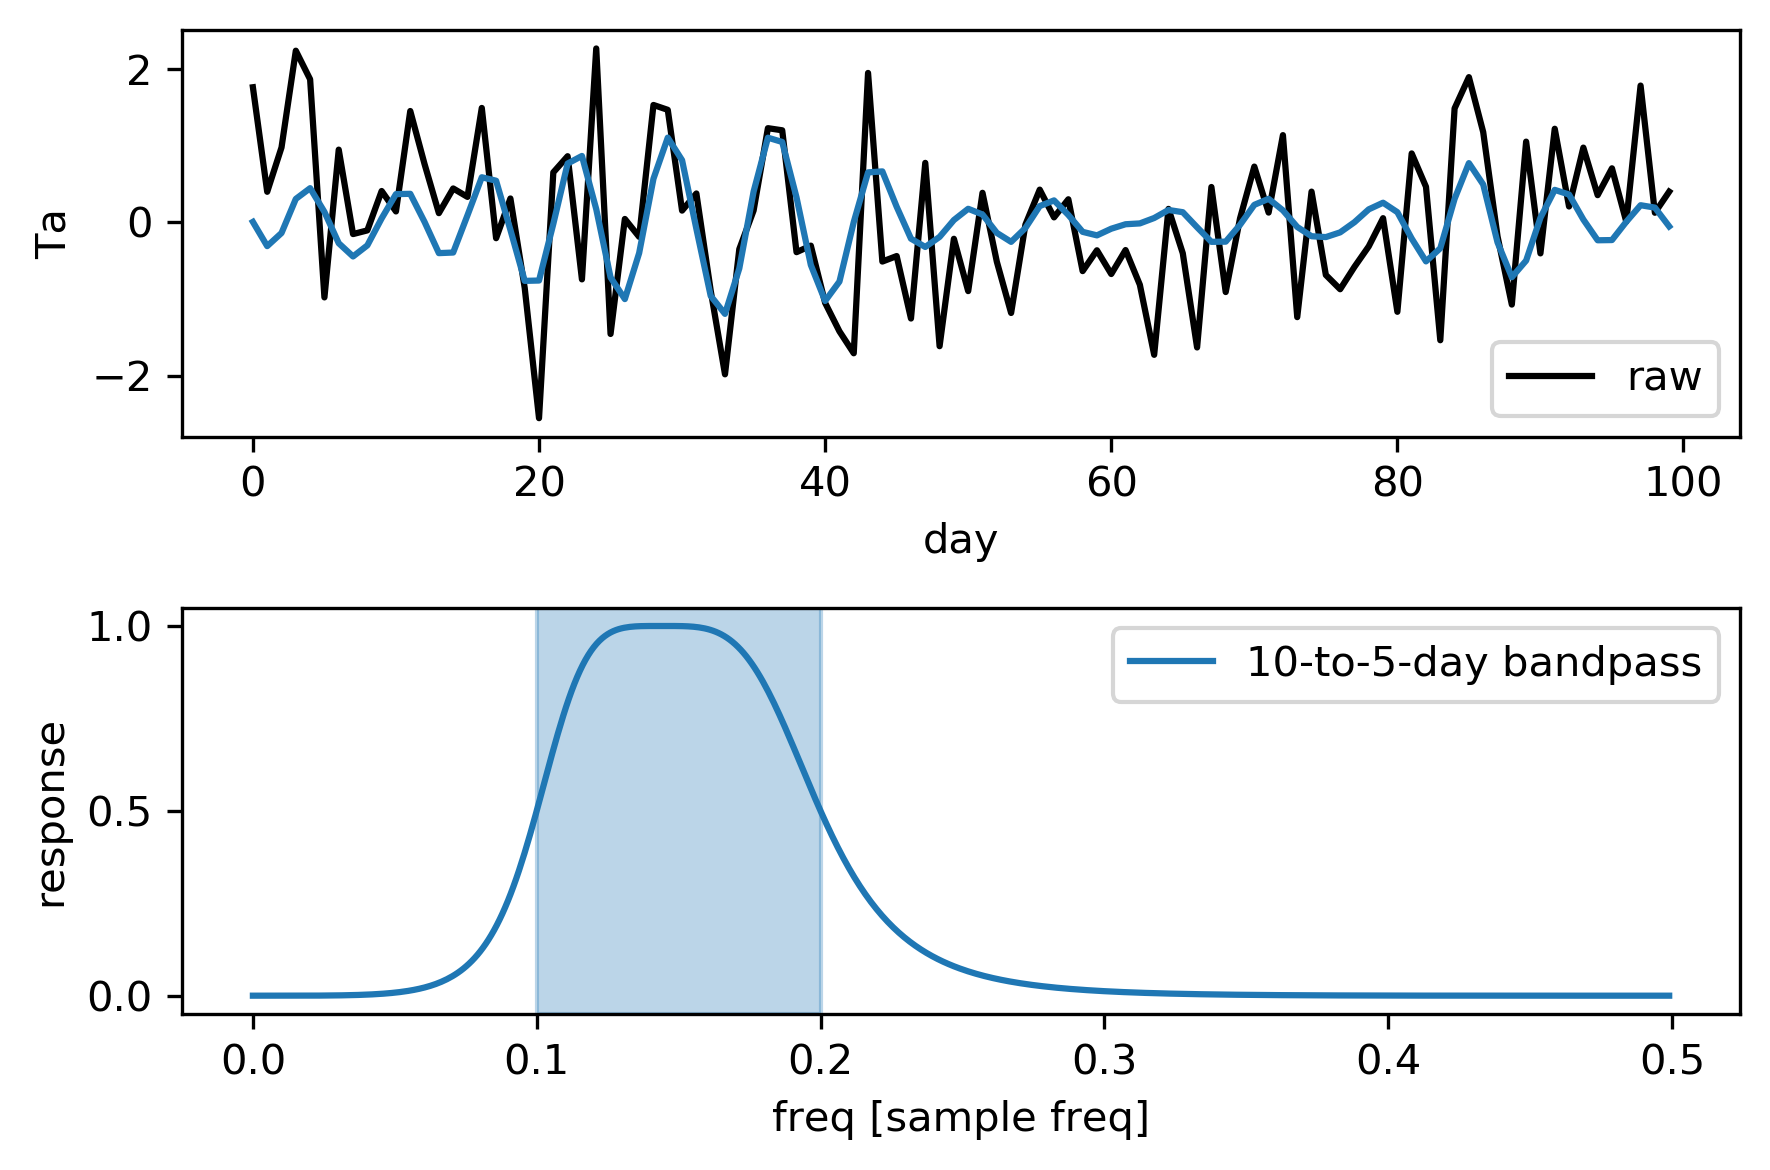

In [10]:
fig, axes = plt.subplots(2, 1)
ax = axes[0]
da.plot(label='raw', color='k', ax=ax)
da.filter.bandpass([1/10, 1/5]).plot(ax=ax)
ax.legend(loc='lower right')

ax = axes[1]
xfilter.bandpass_response([1/10, 1/5]).plot(label='10-to-5-day bandpass', ax=ax)
ax.axvspan(1/10, 1/5, alpha=0.3, color='C0')
ax.legend()

plt.tight_layout()